In [ ]:
#Ziming Dong
#CSE 572 Assignment 2
#03/7/2020

In [19]:
#Ziming Dong
#CSE 572 Assignment 1
#02/10/2020

import matplotlib.pyplot as plt
import pandas as pd
import os,glob
import warnings
import numpy as np
import seaborn
from scipy.fftpack import fft,ifft
from scipy.stats import kurtosis,skew
from sklearn.decomposition import PCA
from numpy import linalg as LA

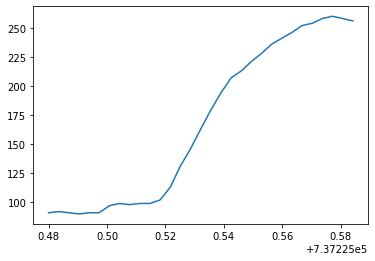

,cgmDatenum_ 1,cgmDatenum_ 2,cgmDatenum_ 3,cgmDatenum_ 4,cgmDatenum_ 5,cgmDatenum_ 6,cgmDatenum_ 7,cgmDatenum_ 8,cgmDatenum_ 9,cgmDatenum_10,...,cgmDatenum_22,cgmDatenum_23,cgmDatenum_24,cgmDatenum_25,cgmDatenum_26,cgmDatenum_27,cgmDatenum_28,cgmDatenum_29,cgmDatenum_30,cgmDatenum_31
0,737225.5842,737225.5807,737225.5772,737225.5737,737225.5703,737225.5668,737225.5633,737225.5598,737225.5564,737225.5529,...,737225.5112,737225.5078,737225.5043,737225.5008,737225.4973,737225.4939,737225.4904,737225.4869,737225.4835,737225.4800
1,737217.6278,737217.6243,737217.6208,737217.6174,737217.6139,737217.6104,737217.6069,737217.6035,737217.6000,737217.5965,...,737217.5549,737217.5514,737217.5479,737217.5444,737217.5410,737217.5375,737217.5340,737217.5306,737217.5271,NaN
2,737216.5513,737216.5478,737216.5444,737216.5409,737216.5374,737216.5340,737216.5305,737216.5270,737216.5235,737216.5201,...,737216.4784,737216.4749,737216.4715,737216.4680,737216.4645,737216.4610,737216.4576,737216.4541,737216.4506,NaN
3,737215.5721,737215.5686,737215.5652,737215.5617,737215.5582,737215.5547,737215.5513,737215.5478,737215.5443,737215.5408,...,737215.4992,737215.4957,737215.4922,737215.4888,737215.4853,737215.4818,737215.4783,737215.4749,737215.4714,737215.4679
4,737201.5894,737201.5859,737201.5825,737201.5790,737201.5755,737201.5720,737201.5686,737201.5651,737201.5616,737201.5582,...,737201.5165,737201.5130,737201.5095,737201.5061,737201.5026,737201.4991,737201.4957,737201.4922,737201.4887,NaN
5,737196.6074,737196.6040,737196.6005,737196.5970,737196.5935,737196.5900,737196.5866,737196.5831,737196.5796,737196.5762,...,737196.5345,737196.5310,737196.5275,737196.5241,737196.5206,737196.5171,737196.5137,737196.5102,737196.5067,737196.5032
6,737140.5862,737140.5827,737140.5792,737140.5758,737140.5723,737140.5688,737140.5653,737140.5619,737140.5584,737140.5549,...,737140.5133,737140.5098,737140.5063,737140.5028,737140.4994,737140.4959,737140.4924,737140.4889,737140.4855,NaN
7,737120.5722,737120.5688,737120.5653,737120.5618,737120.5584,737120.5549,737120.5514,737120.5479,737120.5445,737120.5410,...,737120.4993,737120.4959,737120.4924,737120.4889,737120.4854,737120.4820,737120.4785,737120.4750,737120.4716,NaN
8,737117.5721,737117.5686,737117.5651,737117.5617,737117.5582,737117.5547,737117.5512,737117.5478,737117.5443,737117.5408,...,737117.4992,737117.4957,737117.4922,737117.4887,737117.4853,737117.4818,737117.4783,737117.4748,737117.4714,737117.4679
9,737112.5762,737112.5727,737112.5693,737112.5658,737112.5623,737112.5588,737112.5554,737112.5519,737112.5484,737112.5450,...,737112.5033,737112.4998,737112.4963,737112.4928,737112.4894,737112.4859,737112.4824,737112.4789,737112.4755,NaN


In [20]:
# plot the first cell array 
a = pd.read_csv("CGMDatenumLunchPat1.csv")
b = pd.read_csv("CGMSeriesLunchPat1.csv")
plt.figure()
plt.plot(a.iloc[0],b.iloc[0])
plt.show()
a

In [21]:
# Combine the five csv files and clean the data
path= "/Users/dongziming/Desktop/data mining/assignment 1/DataFolder"

all_files = glob.glob(os.path.join(path,"CGMSeriesLunch*.csv"))
all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=',')
    df['file'] = f.split('/')[-1]
    all_df.append(df)    
merged_df = pd.concat(all_df, ignore_index=True, sort=True)

#Drop the extra time series for every subject.
total=merged_df.drop(['cgmSeries_42','cgmSeries_41','cgmSeries_40','cgmSeries_39','cgmSeries_38','cgmSeries_37','cgmSeries_36','cgmSeries_35','cgmSeries_34','cgmSeries_33','cgmSeries_32','cgmSeries_31'], axis=1)


In [22]:
#Drop the missing value array.
df1=total.dropna()

final=df1.iloc[:,::-1]
nofrows= final.shape[0]
print (nofrows)

final=final.drop(columns="file")


186


In [23]:
#Feature 1 Ploynomial curve fitting
z_total=[]
z_norm=[]
for i in range(0,186):
    yaxis=np.asarray(final.iloc[i])
    x=np.arange(30)
    z1=np.polyfit(x,yaxis,5)
    z2=z1/z1.max(axis=0)
    print(z1)
    z_total.append(z1)
    z_norm.append(z2)
#print value of ploynomial curve fitting


[-5.16314423e-05  5.55933951e-03 -1.91396409e-01  2.47083028e+00
 -5.11660689e+00  1.15239676e+02]
[ 1.09898099e-04 -7.74377897e-03  1.58981028e-01 -5.20504231e-01
 -2.49007302e+00  9.41564171e+01]
[-8.18942448e-05  1.02549526e-02 -4.17472223e-01  6.34453522e+00
 -2.56510982e+01  1.13386036e+02]
[-1.39015279e-04  1.21446522e-02 -3.76229467e-01  4.75514701e+00
 -1.51371311e+01  6.73301018e+01]
[-1.50955394e-06 -1.74578222e-03  1.09856739e-01 -2.38854408e+00
  2.34098476e+01  5.67939538e+01]
[ 1.36384850e-04 -8.95645187e-03  1.72681400e-01 -6.46559984e-01
 -1.66445237e+00  8.62869588e+01]
[ 1.05210750e-04 -5.55150087e-03  3.49459555e-02  1.49859492e+00
 -1.12604130e+01  1.35458323e+02]
[-1.25575677e-04  1.25741909e-02 -4.34750541e-01  5.91721563e+00
 -2.42783362e+01  1.02362161e+02]
[ 1.10123896e-04 -8.50273474e-03  2.03457453e-01 -1.13176649e+00
 -2.21308450e+00  1.56057012e+02]
[ 2.18050362e-04 -1.62522655e-02  4.34361445e-01 -5.27744139e+00
  3.33656128e+01  7.21713041e+01]
[ 4.090140

In [24]:
#Feature 2 FFT
f_total=[]
f_norm=[]
for i in range(0,186):
    x=np.linspace(0,29,30)
    y=final.iloc[i]
    yy=abs(fft(y))              
    yy1=np.delete(yy,0)
    yy2=np.unique(yy1)
    Max5=np.partition(yy2,-5)[-5:]
    normMax5=Max5/Max5.max(axis=0)
    f_total.append(Max5)
    f_norm.append(normMax5)
#print value of FFT    
f_total
f_norm

[array([0.24707007, 0.3528653 , 0.45909917, 0.72054321, 1.        ]),
 array([0.09295071, 0.18194246, 0.18605636, 0.26703784, 1.        ]),
 array([0.0280489 , 0.04792425, 0.10824516, 0.21587695, 1.        ]),
 array([0.18397835, 0.19196384, 0.37293982, 0.60428866, 1.        ]),
 array([0.15421837, 0.43269186, 0.5794977 , 0.65334458, 1.        ]),
 array([0.08526022, 0.11118713, 0.16147593, 0.1944668 , 1.        ]),
 array([0.04267437, 0.04499601, 0.04629931, 0.04651862, 1.        ]),
 array([0.08418613, 0.10014828, 0.11563362, 0.34869685, 1.        ]),
 array([0.11722128, 0.19244819, 0.21254638, 0.2944275 , 1.        ]),
 array([0.18759171, 0.19174256, 0.26995057, 0.48107203, 1.        ]),
 array([0.13206579, 0.14344314, 0.19749137, 0.29849511, 1.        ]),
 array([0.04951259, 0.08046184, 0.15739426, 0.1827247 , 1.        ]),
 array([0.10887091, 0.12815828, 0.1580627 , 0.2938596 , 1.        ]),
 array([0.24183933, 0.26751035, 0.42962338, 0.77460407, 1.        ]),
 array([0.05568389, 

In [25]:
#feature 3 skewness 
s_total=[]
for i in range(0,186):
    s1=np.array(skew(final.iloc[i]))
    s_total.append(s1)
#Print value of skewness
s_total



[array(-0.24476876),
 array(-0.01466725),
 array(0.31559477),
 array(-0.57472905),
 array(-1.51687427),
 array(-0.20470875),
 array(-0.09651655),
 array(0.42898656),
 array(0.33375618),
 array(-1.35102506),
 array(-0.1909882),
 array(-0.32693899),
 array(-0.48368939),
 array(-0.92759423),
 array(0.50037683),
 array(-0.02286187),
 array(-0.0361844),
 array(1.21545532),
 array(0.12776141),
 array(-0.01878403),
 array(0.09594616),
 array(0.50075357),
 array(-0.74502509),
 array(-0.39971943),
 array(1.56716876),
 array(0.09010765),
 array(0.28702385),
 array(-0.89597471),
 array(-0.47727789),
 array(0.66245709),
 array(-0.23359811),
 array(0.91644993),
 array(0.80845687),
 array(0.30501389),
 array(-0.34559213),
 array(-0.04733586),
 array(0.36476719),
 array(-0.15569571),
 array(-0.0859139),
 array(0.4127376),
 array(0.08882159),
 array(-0.11892948),
 array(-0.3097983),
 array(0.13439691),
 array(-0.29036544),
 array(0.59871926),
 array(0.2815318),
 array(-0.45532457),
 array(0.13588225),

In [26]:
#feature 4 interquartile range
q_total=[]
for i in range(0,186):
    q=final.iloc[i]
    q1_x=np.quantile(q,0.25,interpolation='midpoint')
    q3_x=np.quantile(q,0.75,interpolation='midpoint')
    q4=np.array(q3_x-q1_x)
    q_total.append(q4)
#Print value of interquartile range
q_total



[array(53.5),
 array(134.5),
 array(75.),
 array(57.5),
 array(26.),
 array(82.5),
 array(91.),
 array(43.),
 array(146.5),
 array(31.5),
 array(65.),
 array(53.5),
 array(153.5),
 array(37.),
 array(57.),
 array(36.5),
 array(134.),
 array(9.5),
 array(97.5),
 array(77.5),
 array(83.5),
 array(20.5),
 array(25.),
 array(22.),
 array(9.),
 array(117.5),
 array(25.),
 array(28.5),
 array(11.5),
 array(27.),
 array(78.5),
 array(30.),
 array(28.),
 array(45.),
 array(93.),
 array(122.),
 array(41.),
 array(117.),
 array(82.5),
 array(47.),
 array(95.),
 array(58.5),
 array(151.5),
 array(97.),
 array(37.5),
 array(53.5),
 array(74.),
 array(100.),
 array(25.),
 array(73.),
 array(94.),
 array(61.),
 array(131.),
 array(71.5),
 array(145.5),
 array(93.5),
 array(21.5),
 array(13.5),
 array(64.5),
 array(188.5),
 array(85.5),
 array(55.),
 array(139.5),
 array(65.),
 array(118.),
 array(117.5),
 array(32.),
 array(116.),
 array(64.),
 array(122.),
 array(61.5),
 array(40.),
 array(100.5),


In [27]:
#Define a function to normalization value to put into PCA.
def normalize( lst ):
    newlst = [] # the variable to store normalized values
    minx = lst[0] # variable to store minx
    maxx = lst[0] # variable for maxx
    for k in lst: # loop to find min and max in input list
        if k > maxx:
            maxx = k # finding the maxx
        if k < minx:
            minx = k # finding the minx
    for k in lst:
        newlst = newlst + [float((k-minx))/(maxx-minx)] # computing the normalized value
    return newlst


In [28]:
#Normalization data
s_norm=np.array(normalize(s_total))
q_norm=np.array(normalize(q_total))

z_norm=np.array(z_norm)
f_norm=np.array(f_norm)


In [32]:
#Combine data together as a feature matrix
matrix=np.append(z_norm,f_norm,axis=1)

matrix1=np.vstack((s_norm,q_norm))

matrix1=matrix1.T

feature_matrix=np.concatenate((matrix,matrix1),axis=1)
matrix
#Print feature matrix
feature_matrix.shape

(186, 13)

In [18]:
#Create a feature matrix where each row is a collection of features from each time series.
pca=PCA(n_components=13)

principalComponents=pca.fit_transform(feature_matrix)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3',
                           'principal component 4','principal component 5','principal component 6','principal component 7',
                          'principal component 8','principal component 9','principal component 10','principal component 11'
                         ,'principal component 12','principal component 13'])

In [19]:
#Show the PCA feature matrix with 13 principal components
principalDf

print(pca.explained_variance_ratio_)

[5.38206980e-01 1.68025301e-01 1.30017118e-01 8.82504126e-02
 5.03979857e-02 1.96053888e-02 4.40636066e-03 1.08924262e-03
 1.21094623e-06 1.59315440e-10 1.17445720e-15 4.90368462e-37
 2.75251189e-48]


In [21]:
# Shows the components value to select top 5 features.
values=abs(pca.components_)
values

array([[9.76099145e-07, 6.80369037e-05, 1.46908951e-03, 9.52509634e-03,
        4.14621526e-02, 0.00000000e+00, 1.98937592e-01, 2.55406210e-01,
        4.23484743e-01, 7.08818019e-01, 0.00000000e+00, 6.78195287e-02,
        4.54991980e-01],
       [8.14238276e-07, 5.07108192e-05, 9.09902055e-04, 3.83896244e-04,
        1.52983591e-01, 2.77555756e-17, 4.10245567e-02, 6.59269485e-02,
        4.06401700e-02, 1.27436956e-01, 0.00000000e+00, 9.66914500e-01,
        1.33229931e-01],
       [1.56494560e-07, 1.98660359e-05, 5.05468748e-04, 2.86032712e-03,
        5.59411011e-02, 8.32667268e-17, 1.96877364e-01, 2.33801791e-01,
        2.94381788e-01, 2.16518981e-01, 0.00000000e+00, 1.74828535e-01,
        8.59844206e-01],
       [7.64486369e-06, 6.27094915e-04, 1.83500200e-02, 2.21694853e-01,
        8.73027669e-01, 0.00000000e+00, 1.06076148e-01, 1.59872160e-01,
        2.67220673e-01, 2.46342139e-01, 0.00000000e+00, 1.23438087e-01,
        6.47874098e-02],
       [3.27527029e-06, 2.57588955e-